# Data Loading and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
from wordcloud import WordCloud 

In [2]:
imdb=pd.read_csv('imdb-movies-dataset.csv')

In [3]:
imdb.shape

(10000, 17)

In [4]:
imdb.head()

,Poster,Title,Release Date,Budget,Revenue,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,16-07-2022,42110861,4886739,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,12-05-2023,14627858,7458541,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,20-04-2023,48805376,7814085,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,07-10-2022,28147070,4951558,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,05-01-2023,49549901,6891688,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [5]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Poster          10000 non-null  object 
 1   Title           10000 non-null  object 
 2   Release Date    10000 non-null  object 
 3   Budget          10000 non-null  int64  
 4   Revenue         10000 non-null  int64  
 5   Certificate     7370 non-null   object 
 6   Duration (min)  9664 non-null   float64
 7   Genre           9993 non-null   object 
 8   Rating          9596 non-null   float64
 9   Metascore       7555 non-null   float64
 10  Director        9995 non-null   object 
 11  Cast            9961 non-null   object 
 12  Votes           9596 non-null   object 
 13  Description     10000 non-null  object 
 14  Review Count    9999 non-null   object 
 15  Review Title    9483 non-null   object 
 16  Review          9484 non-null   object 
dtypes: float64(3), int64(2), object(

In [6]:
imdb.isnull().sum()

Poster               0
Title                0
Release Date         0
Budget               0
Revenue              0
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [7]:
imdb['Release Date']=pd.to_datetime(imdb['Release Date'],format="%d-%m-%Y")

In [8]:
imdb['Votes']=imdb['Votes'].str.replace(',', '')

In [9]:
imdb['Votes']=imdb['Votes'].astype(float)

In [10]:
missing_values=imdb.isna().sum()
missing_percentage=round((missing_values/len(imdb))*100,2)
missing_data=pd.DataFrame({'Missing Values':missing_values,'Missing Percentage':missing_percentage}).loc[missing_values>0]
missing_data.reset_index().rename(columns={'index':'Columns_missing'})

,Columns_missing,Missing Values,Missing Percentage
0,Certificate,2630,26.30
1,Duration (min),336,3.36
2,Genre,7,0.07
3,Rating,404,4.04
4,Metascore,2445,24.45
5,Director,5,0.05
6,Cast,39,0.39
7,Votes,404,4.04
8,Review Count,1,0.01
9,Review Title,517,5.17


In [11]:
cols_to_remove=[]
cols_null_values=[]
cols_to_replace=[]
for index, value in enumerate(missing_data['Missing Percentage']):
    if value>25:
        cols_to_remove.append(missing_data.index[index])
    elif value<1:
        cols_null_values.append(missing_data.index[index])
    else:
        cols_to_replace.append(missing_data.index[index])

In [12]:
cols_to_remove

['Certificate']

In [13]:
for i in cols_to_remove:
    imdb.drop(columns=i,inplace=True)

In [14]:
for i in cols_null_values:
    imdb.dropna(subset=i,inplace=True)

In [15]:
cols_to_replace

['Duration (min)', 'Rating', 'Metascore', 'Votes', 'Review Title', 'Review']

In [16]:
average_duration=imdb['Duration (min)'].mean()
average_duration=round(average_duration,0)
imdb['Duration (min)']=imdb['Duration (min)'].fillna(average_duration)

In [17]:
average_rating=imdb['Rating'].mean()
average_rating=round(average_rating,1)
imdb['Rating']=imdb['Rating'].fillna(average_rating)

In [18]:
average_votes=imdb['Votes'].mean()
average_votes=round(average_votes,0)
imdb['Votes']=imdb['Votes'].fillna(average_votes)

In [19]:
imdb['Review Title']=imdb['Review Title'].fillna('N/A')
imdb['Review']=imdb['Review'].fillna('N/A')

In [20]:
imdb['Metascore']=imdb['Metascore'].fillna(imdb['Metascore'].mean())

In [21]:
imdb.isnull().sum()

Poster            0
Title             0
Release Date      0
Budget            0
Revenue           0
Duration (min)    0
Genre             0
Rating            0
Metascore         0
Director          0
Cast              0
Votes             0
Description       0
Review Count      0
Review Title      0
Review            0
dtype: int64

In [22]:
imdb.shape

(9954, 16)

In [23]:
imdb.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
Poster,https://m.media-amazon.com/images/M/MV5BYWRkZj...,https://m.media-amazon.com/images/M/MV5BZGI4NT...,https://m.media-amazon.com/images/M/MV5BZjIyOT...,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,https://m.media-amazon.com/images/M/MV5BNTk1MT...,https://m.media-amazon.com/images/M/MV5BY2JlYj...,https://m.media-amazon.com/images/M/MV5BYTYyOD...,https://m.media-amazon.com/images/M/MV5BZTc3Ym...,https://m.media-amazon.com/images/M/MV5BOTVhZG...,https://m.media-amazon.com/images/M/MV5BOWI5YT...,...,https://m.media-amazon.com/images/M/MV5BNjFjYm...,https://m.media-amazon.com/images/M/MV5BMjFkZG...,https://m.media-amazon.com/images/M/MV5BMTUzOT...,https://m.media-amazon.com/images/M/MV5BMzRkNj...,https://m.media-amazon.com/images/M/MV5BNmRhZW...,https://m.media-amazon.com/images/M/MV5BMzg5MW...,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,https://m.media-amazon.com/images/M/MV5BMTAwOD...,https://m.media-amazon.com/images/M/MV5BMmE4ZD...
Title,The Idea of You,Kingdom of the Planet of the Apes,Unfrosted,The Fall Guy,Challengers,Abigail,Civil War,Twisters,Anyone But You,The Ministry of Ungentlemanly Warfare,...,The Masque of the Red Death,Beyond the Law,Kiss of the Spider Woman,South Central,Mutiny on the Bounty,The Greatest Show on Earth,Berserk: Ougon Jidai-hen I - Haou no Tamago,Is-slottet,Loving Pablo,Un homme et une femme
Release Date,2022-07-16 00:00:00,2023-05-12 00:00:00,2023-04-20 00:00:00,2022-10-07 00:00:00,2023-01-05 00:00:00,2023-02-25 00:00:00,2023-02-26 00:00:00,2023-05-14 00:00:00,2022-06-11 00:00:00,2022-09-06 00:00:00,...,2022-05-08 00:00:00,2022-09-20 00:00:00,2022-08-16 00:00:00,2022-12-06 00:00:00,2022-06-07 00:00:00,2023-02-11 00:00:00,2022-08-19 00:00:00,2023-05-06 00:00:00,2022-12-29 00:00:00,2022-05-22 00:00:00
Budget,42110861,14627858,48805376,28147070,49549901,52068286,46136436,23150357,14042912,20939343,...,19612431,54592464,29288225,38200271,15249672,40892520,29174237,39411922,49927298,35426947
Revenue,4886739,7458541,7814085,4951558,6891688,4253458,4499539,4862696,5006926,6998497,...,5643421,6940413,7076615,7401048,7429611,5496436,5128209,6770819,5635966,5634048
Duration (min),115.0,145.0,97.0,126.0,131.0,109.0,109.0,109.0,103.0,120.0,...,89.0,89.0,120.0,98.0,132.0,152.0,76.0,78.0,123.0,102.0
Genre,"Comedy, Drama, Romance","Action, Adventure, Sci-Fi","Biography, Comedy, History","Action, Comedy, Drama","Drama, Romance, Sport","Horror, Thriller","Action, Adventure, Thriller","Action, Adventure, Thriller","Comedy, Romance","Action, Drama, War",...,"Drama, Horror","Action, Crime, Thriller",Drama,"Crime, Drama","Adventure, Biography, Drama","Drama, Family, Romance","Animation, Action, Adventure","Mystery, Drama","Biography, Crime, Drama","Drama, Romance"
Rating,6.4,7.3,5.5,7.3,7.7,6.8,7.5,6.4,6.1,7.0,...,6.9,3.7,7.3,6.8,7.6,6.5,7.5,6.5,6.4,7.5
Metascore,67.0,66.0,42.0,73.0,82.0,62.0,75.0,58.065537,52.0,57.0,...,77.0,58.065537,80.0,64.0,87.0,76.0,58.065537,58.065537,42.0,58.065537
Director,Michael Showalter,Wes Ball,Jerry Seinfeld,David Leitch,Luca Guadagnino,Matt Bettinelli-Olpin,Alex Garland,Lee Isaac Chung,Will Gluck,Guy Ritchie,...,Roger Corman,James Cullen Bressack,Hector Babenco,Stephen Milburn Anderson,Frank Lloyd,Cecil B. DeMille,Toshiyuki Kubooka,Per Blom,Fernando León de Aranoa,Claude Lelouch


# Data Exploration

In [24]:
imdb.describe()

,Release Date,Budget,Revenue,Duration (min),Rating,Metascore,Votes
count,9954,9.954000e+03,9.954000e+03,9954.000000,9954.000000,9954.000000,9.954000e+03
mean,2022-09-14 07:55:04.882459136,2.818803e+07,5.993786e+06,108.803195,6.436940,58.065537,9.642243e+04
min,2016-10-02 00:00:00,1.004975e+06,4.001122e+06,45.000000,1.300000,1.000000,6.000000e+00
25%,2022-07-02 00:00:00,1.440842e+07,4.996012e+06,95.000000,5.900000,50.000000,1.205025e+04
50%,2022-10-10 00:00:00,2.801594e+07,6.010436e+06,105.000000,6.500000,58.065537,3.978250e+04
75%,2023-01-20 00:00:00,4.202331e+07,6.983931e+06,118.000000,7.200000,67.000000,9.686500e+04
max,2023-05-19 00:00:00,5.555545e+07,7.998826e+06,746.000000,9.700000,100.000000,2.894940e+06
std,NaN,1.578142e+07,1.151750e+06,22.762499,1.031534,15.543383,1.786859e+05


In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

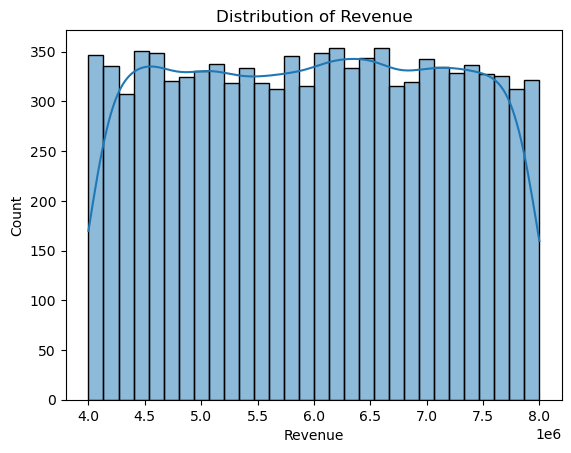

In [26]:
sns.histplot(imdb['Revenue'],bins=30,kde=True)
plt.title('Distribution of Revenue')
plt.show()

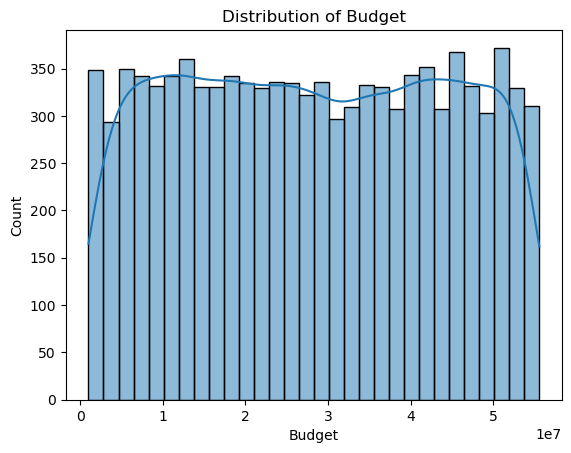

In [27]:
sns.histplot(imdb['Budget'],bins=30,kde=True)
plt.title('Distribution of Budget')
plt.show()

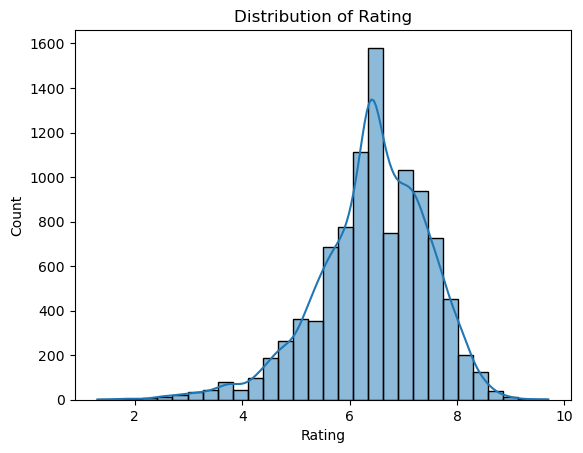

In [28]:
sns.histplot(imdb['Rating'],bins=30,kde=True)
plt.title('Distribution of Rating')
plt.show()

In [29]:
numerical_data=imdb.select_dtypes('number')

In [30]:
numerical_correlation=numerical_data.corr()
numerical_correlation

,Budget,Revenue,Duration (min),Rating,Metascore,Votes
Budget,1.000000,0.006483,-0.007314,-0.006967,-0.015496,-0.016578
Revenue,0.006483,1.000000,0.003117,0.011716,-0.005948,0.004242
Duration (min),-0.007314,0.003117,1.000000,0.360126,0.195864,0.229547
Rating,-0.006967,0.011716,0.360126,1.000000,0.579345,0.369326
Metascore,-0.015496,-0.005948,0.195864,0.579345,1.000000,0.223838
Votes,-0.016578,0.004242,0.229547,0.369326,0.223838,1.000000


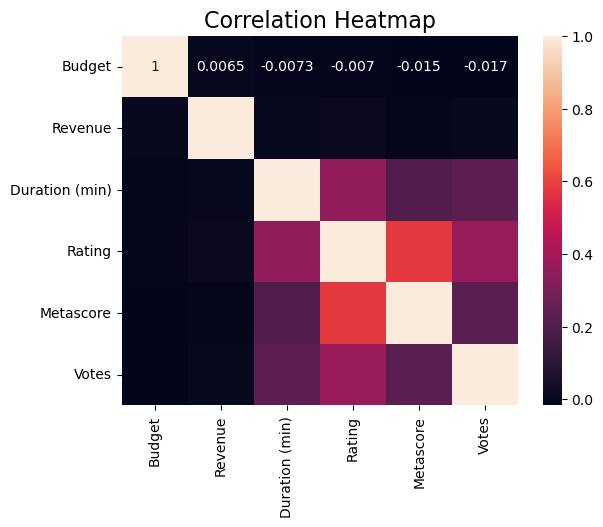

In [31]:
sns.heatmap(numerical_correlation,annot=True,)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [32]:
imdb['Genre1']=imdb['Genre'].str.split(',').str[0]

In [33]:
imdb['Genre1'].unique()

array(['Comedy', 'Action', 'Biography', 'Drama', 'Horror', 'Adventure',
       'Crime', 'Animation', 'Documentary', 'Thriller', 'Fantasy',
       'Mystery', 'Film-Noir', 'Romance', 'Music', 'Sci-Fi', 'Western',
       'Sport', 'War', 'Musical', 'History', 'Family'], dtype=object)

In [34]:
genre_revenue=imdb.groupby('Genre1')['Revenue'].agg(Total_Revenue='sum',Average_Revenue='mean').reset_index()
pd.options.display.float_format = '{:.1f}'.format
genre_revenue

,Genre1,Total_Revenue,Average_Revenue
0,Action,13896236809,5992340.2
1,Adventure,3258550033,5924636.4
2,Animation,2882155978,6029615.0
3,Biography,3294244119,6000444.7
4,Comedy,13233813060,5999008.6
5,Crime,4165130365,6018974.5
6,Documentary,696141807,5949930.0
7,Drama,12742140461,5976613.7
8,Family,25397385,6349346.2
9,Fantasy,380465016,6039127.2


In [35]:
Top5Gross=imdb
Top5Gross.sort_values(by='Revenue',ascending=False).head(5)

,Poster,Title,Release Date,Budget,Revenue,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review,Genre1
5932,https://m.media-amazon.com/images/M/MV5BZmZiYT...,The Stepford Wives,2023-03-18,26628571,7998826,115.0,"Horror, Mystery, Sci-Fi",6.9,54.0,Bryan Forbes,"Katharine Ross, Paula Prentiss, Peter Masterso...",19605.0,Joanna Eberhart has come to the quaint little ...,130,"""Like one of those robots in Disneyland...""","""The Stepford Wives"" certainly isn't the great...",Horror
8053,https://m.media-amazon.com/images/M/MV5BMzc4Nz...,Spacehunter: Adventures in the Forbidden Zone,2022-04-03,29418808,7998531,90.0,"Action, Adventure, Sci-Fi",5.4,58.1,Lamont Johnson,"Peter Strauss, Molly Ringwald, Ernie Hudson, A...",6637.0,"On a distant planet inhabited by mutants, two ...",68,Like Gold To A 12-Year-Old,"Back when I was 12, renting this movie was lik...",Action
2986,https://m.media-amazon.com/images/M/MV5BZDVkMW...,The Hate U Give,2023-03-03,48049780,7997909,133.0,"Crime, Drama",7.5,81.0,George Tillman Jr.,"Amandla Stenberg, Regina Hall, Russell Hornsby...",40226.0,Starr witnesses the fatal shooting of her chil...,359,Just not a good film,"Nothing in this film was new, it was just reha...",Crime
6741,https://m.media-amazon.com/images/M/MV5BMTg3OT...,The Love Guru,2022-11-26,43585827,7997697,87.0,"Comedy, Romance, Sport",3.8,24.0,Marco Schnabel,"Mike Myers, Jessica Alba, Romany Malco, Jessic...",55013.0,"Pitka, an American raised outside of his count...",263,R.I.P. Mike Myers Career,I saw this film last night in a advance screen...,Comedy
2345,https://m.media-amazon.com/images/M/MV5BMTMyNT...,Ocean's Thirteen,2023-02-04,40997329,7997178,122.0,"Crime, Thriller",6.9,62.0,Steven Soderbergh,"George Clooney, Brad Pitt, Matt Damon, Michael...",367886.0,Danny Ocean rounds up the boys for a third hei...,268,Really good,They are back and now there are 13...The movie...,Crime


The analysis of the top 5 highest-grossing movies reveals that a combination of genre diversity, directorial influence, audience ratings, and budget management significantly affects their box office performance. While higher budgets and star directors can attract viewers, the quality of storytelling and audience engagement ultimately play a crucial role in determining a movie's success.

In [36]:
imdb['Month']=imdb['Release Date'].dt.month

In [37]:
imdb['Quarter']=imdb['Release Date'].dt.to_period("Q")

In [38]:
imdb

,Poster,Title,Release Date,Budget,Revenue,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review,Genre1,Month,Quarter
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2022-07-16,42110861,4886739,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...",28744.0,"Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a...",Comedy,7,2022Q3
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023-05-12,14627858,7458541,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...",22248.0,"Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a...",Action,5,2023Q2
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023-04-20,48805376,7814085,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...",18401.0,"In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...,Biography,4,2023Q2
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2022-10-07,28147070,4951558,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...",38953.0,A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...,Action,10,2022Q4
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023-01-05,49549901,6891688,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...",32517.0,"Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...,Drama,1,2023Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2023-02-11,40892520,5496436,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...",16078.0,"The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...,Drama,2,2023Q1
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2022-08-19,29174237,5128209,76.0,"Animation, Action, Adventure",7.5,58.1,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...",14300.0,A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...,Animation,8,2022Q3
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2023-05-06,39411922,6770819,78.0,"Mystery, Drama",6.5,58.1,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740.0,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it...",Mystery,5,2023Q2
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2022-12-29,49927298,5635966,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...",22447.0,A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...,Biography,12,2022Q4


In [39]:
monthly_revenue=imdb.groupby('Month')['Revenue'].agg(Total_Revenue='sum').reset_index()
quarterly_revenue=imdb.groupby('Quarter')['Revenue'].agg(Total_Revenue='sum').reset_index()

In [40]:
monthly_revenue

,Month,Total_Revenue
0,1,4770402928
1,2,4468242785
2,3,5599387597
3,4,7364709198
4,5,5601369196
5,6,4327750496
6,7,4591785442
7,8,4623944096
8,9,4622801626
9,10,4928084858


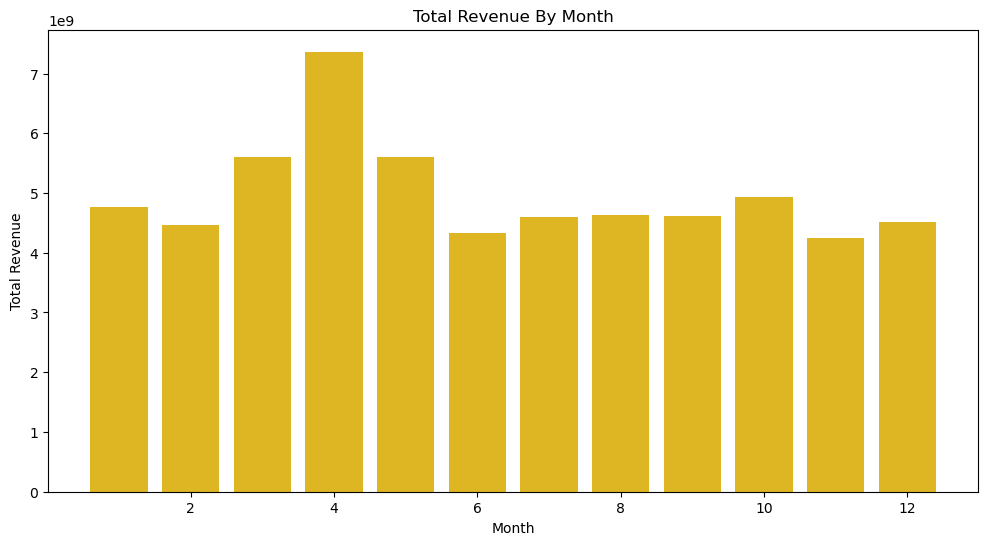

In [41]:
plt.figure(figsize=(12,6))
plt.bar(monthly_revenue['Month'],monthly_revenue['Total_Revenue'],color='#DEB522')
plt.title('Total Revenue By Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

In [42]:
quarterly_revenue

,Quarter,Total_Revenue
0,2016Q4,228927332
1,2017Q1,136489557
2,2017Q2,254489223
3,2017Q3,158833692
4,2017Q4,102424066
5,2022Q1,1260204953
6,2022Q2,12466741869
7,2022Q3,13679697472
8,2022Q4,13360400631
9,2023Q1,13441338800


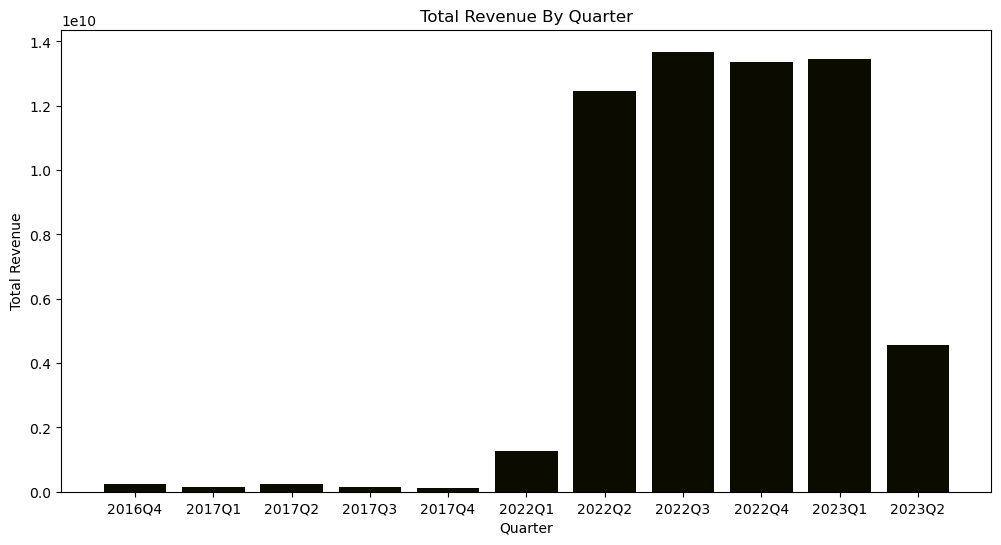

In [43]:
plt.figure(figsize=(12,6))
plt.bar(quarterly_revenue['Quarter'].astype(str),quarterly_revenue['Total_Revenue'],color='#0c0b00')
plt.title('Total Revenue By Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.show()

Seasonality Trends:

Best Performance: Movies released in April, summer months (May to August), and the holiday season (November to December) tend to perform better.
Q2 and Q3 of 2022 are standout periods, indicating that the summer blockbusters have a significant impact on overall box office revenue.

Recommendations:
Release Strategy: Studios might consider scheduling major releases during peak months and quarters to maximize box office revenue.
Market Analysis: Further investigation into specific genres and their performance during these peak times could provide additional insights for future releases.

Task 3.3: Analyze the performance of movies directed by top directors (those who directed the most movies). Do certain directors consistently produce high-grossing movies?

In [44]:
top=imdb.groupby('Director')['Director'].size().rename('count').reset_index()
top.sort_values(by='count',ascending=False).head(10)

,Director,count
826,Clint Eastwood,35
4104,Steven Spielberg,33
3605,Ridley Scott,28
4103,Steven Soderbergh,26
3738,Ron Howard,26
2805,Martin Scorsese,25
167,Alfred Hitchcock,24
4481,Woody Allen,22
3691,Robert Zemeckis,21
4219,Tim Burton,20


In [45]:
top_director_movies = imdb[imdb['Director'].isin(top['Director'])]
director_performance = top_director_movies.groupby('Director').agg(movie_count=('Title','size'),director_count=('Director','size'),average_revenue=('Revenue','mean'),max_revenue=('Revenue','max')).reset_index()
director_performance = director_performance.sort_values(by='average_revenue',ascending=False).head(10)

In [46]:
director_performance

,Director,movie_count,director_count,average_revenue,max_revenue
611,Bryan Forbes,1,1,7998826.0,7998826
2514,Lamont Johnson,1,1,7998531.0,7998531
2728,Marco Schnabel,1,1,7997697.0,7997697
4032,Stelvio Massi,1,1,7996910.0,7996910
1868,Jason DeVan,1,1,7996489.0,7996489
3890,Sean Garrity,1,1,7996392.0,7996392
2635,Louise Archambault,1,1,7995591.0,7995591
1983,Jessica Bendinger,1,1,7992155.0,7992155
2430,Kiah Roache-Turner,1,1,7990708.0,7990708
3891,Sean Hoessli,1,1,7987419.0,7987419


In [47]:
top_performers=imdb.nlargest(10, 'Revenue')

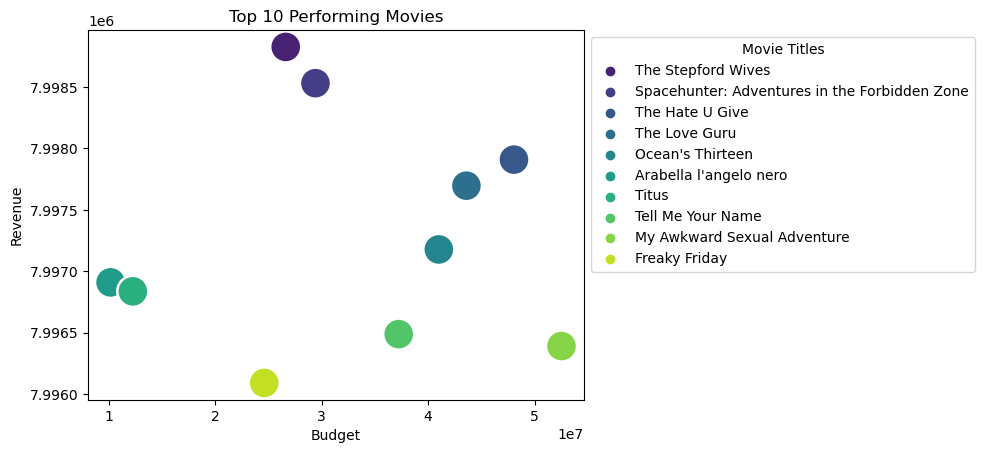

In [48]:
sns.scatterplot(data=top_performers, x='Budget', y='Revenue', hue='Title', s=500, palette='viridis')
plt.title('Top 10 Performing Movies')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.legend(title='Movie Titles', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [49]:
numerical_corr=imdb.select_dtypes('number').corr()

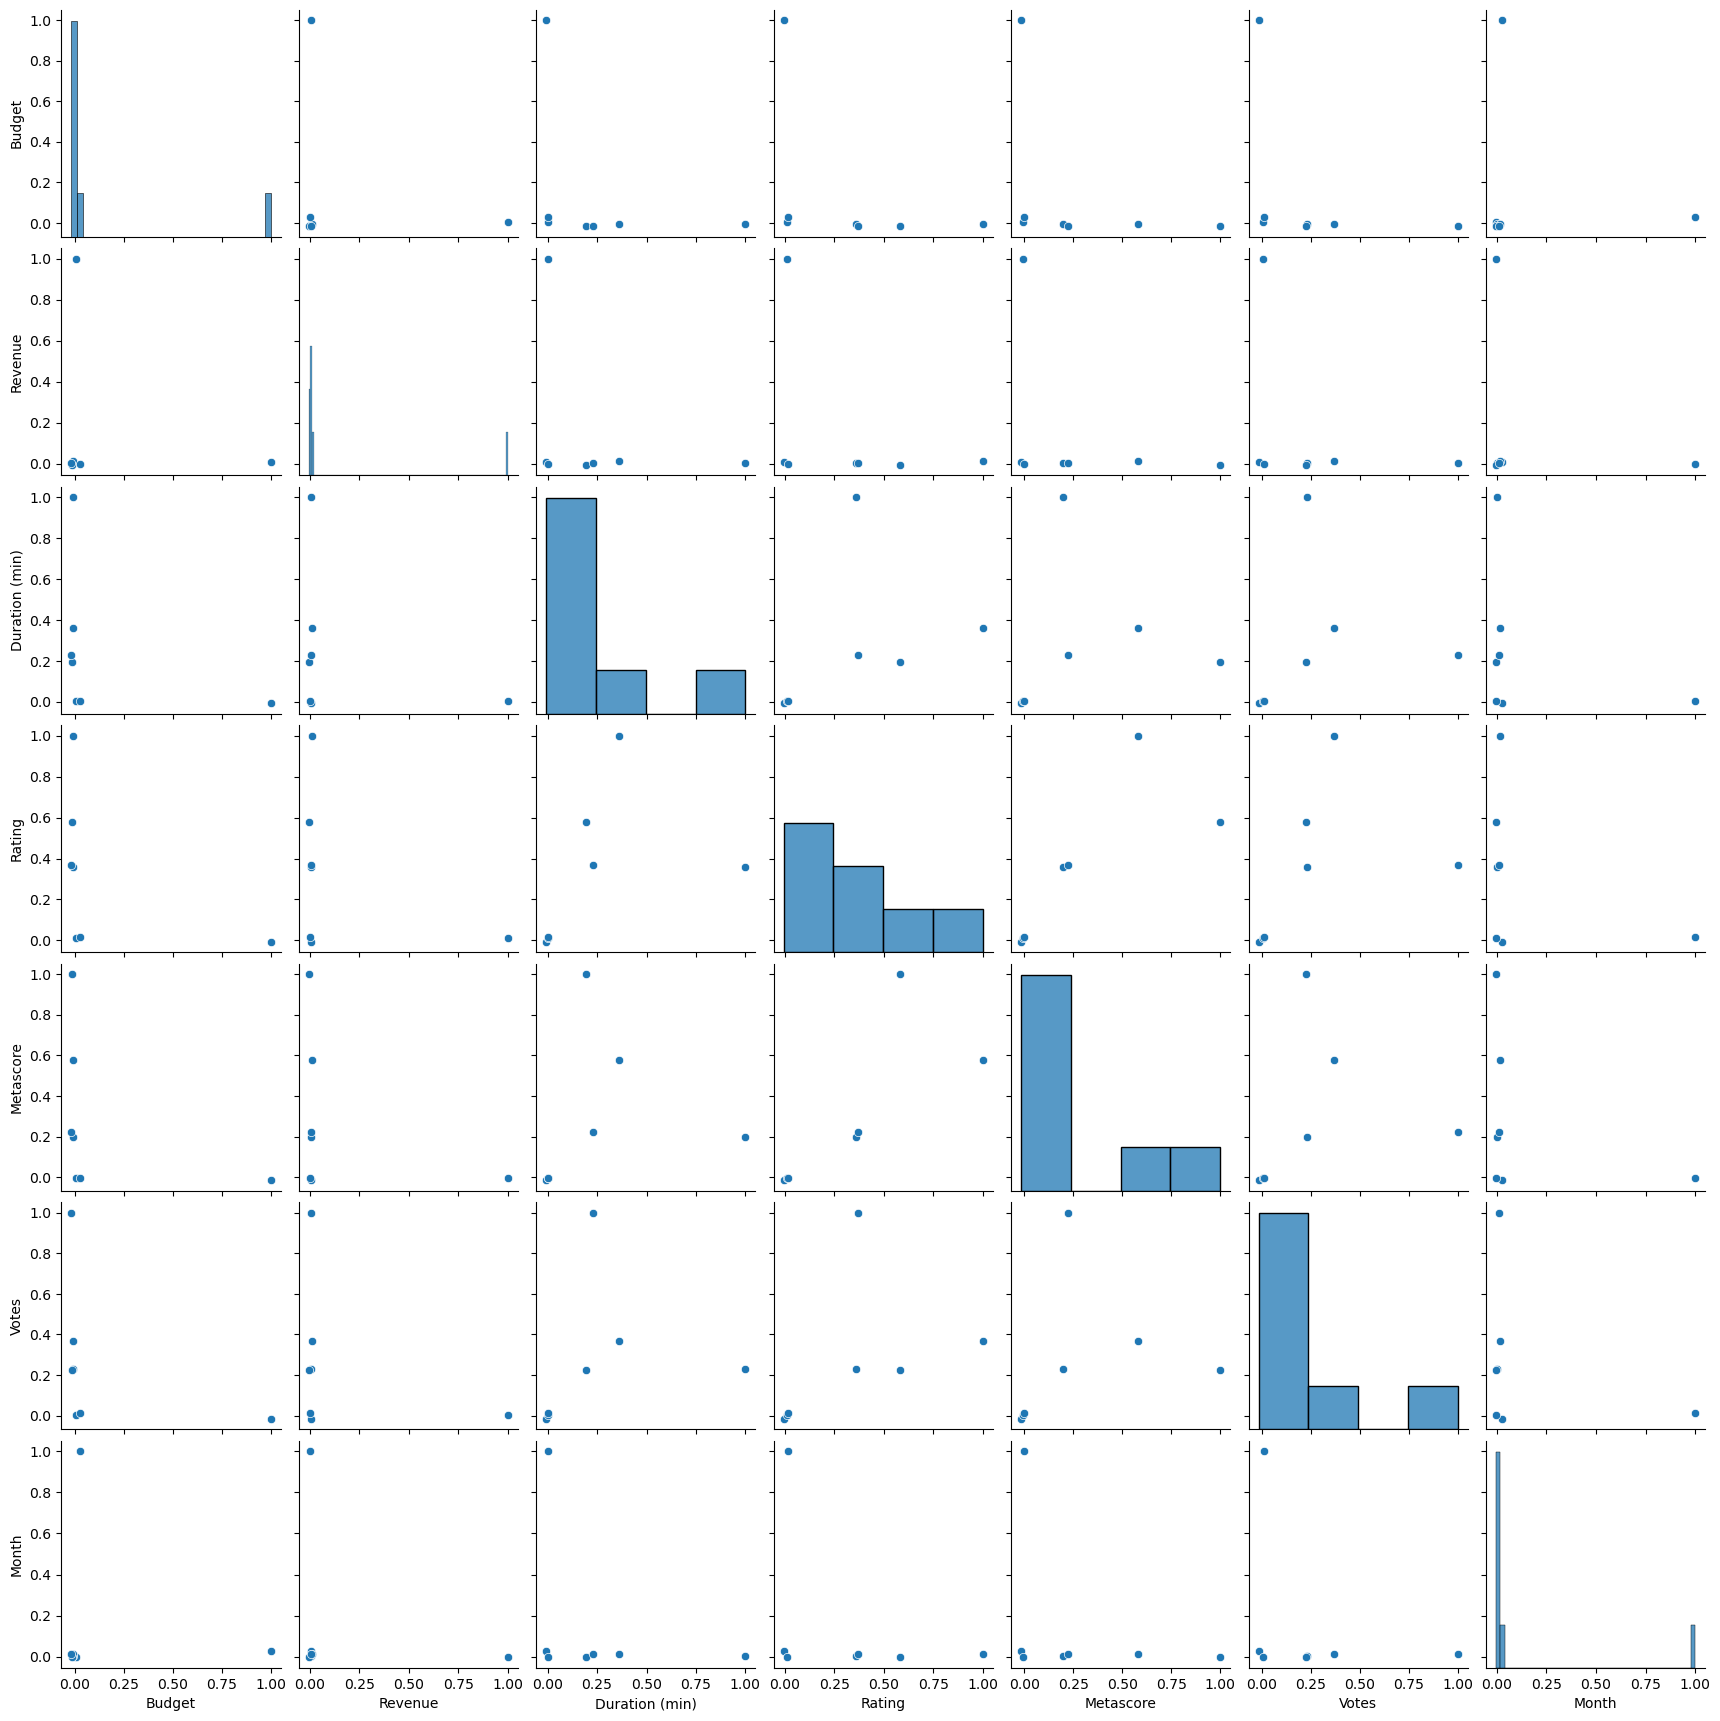

In [50]:
sns.pairplot(numerical_corr)
plt.show()

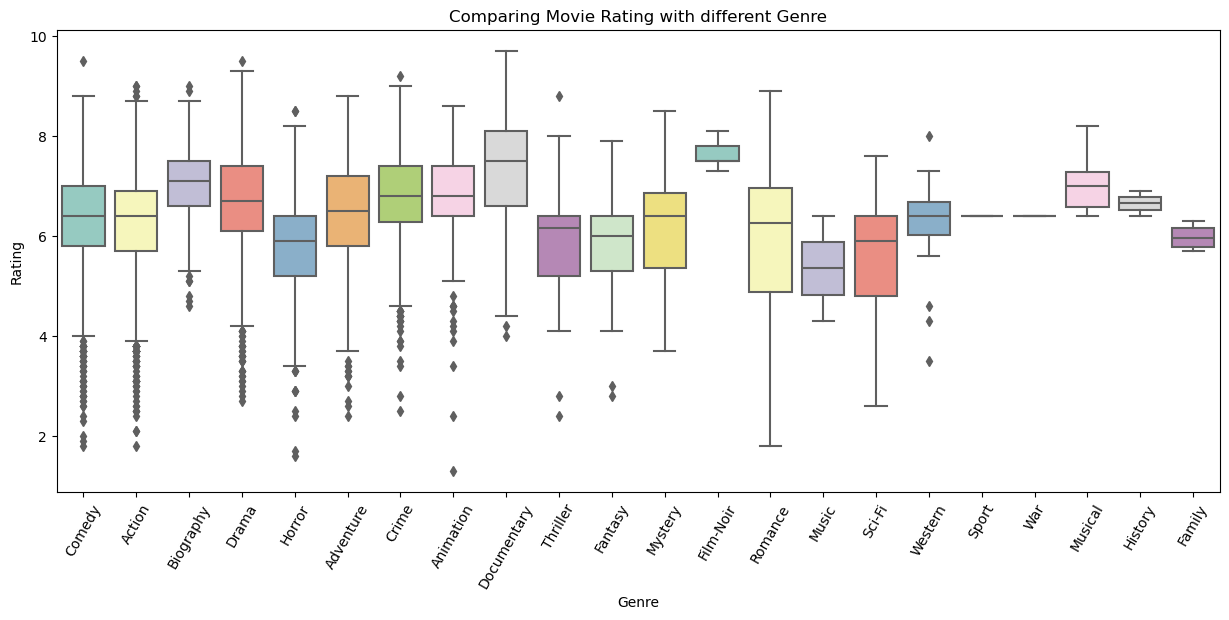

In [51]:
plt.figure(figsize=(15,6))
sns.boxplot(data=imdb, x='Genre1', y='Rating', palette='Set3')
plt.title('Comparing Movie Rating with different Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=60)
plt.show()

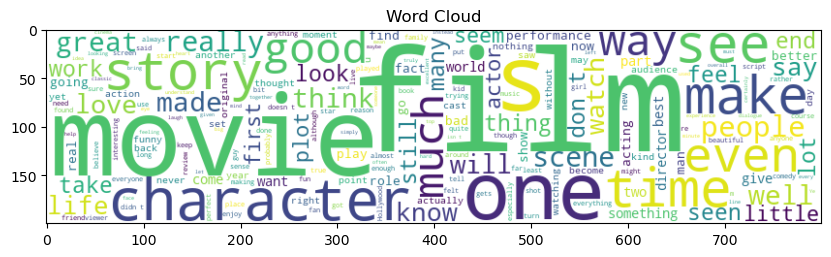

In [52]:
word=imdb['Review'].unique()
text=str(set(word))
wordcloud = WordCloud(width=800, height=200, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.grid(False)
plt.axis('ON') 
plt.title('Word Cloud')
plt.show()

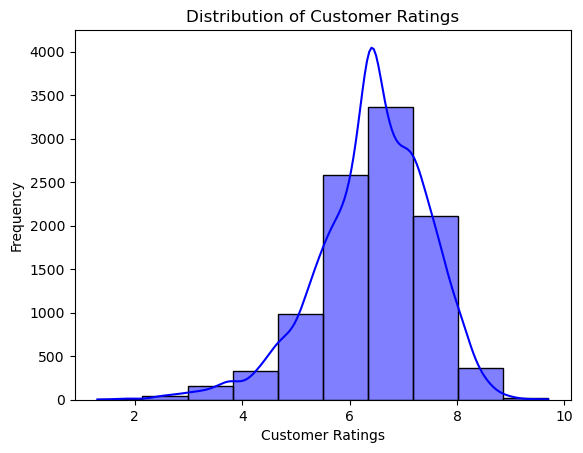

In [53]:
sns.histplot(imdb['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Ratings')
plt.ylabel('Frequency')
plt.show()

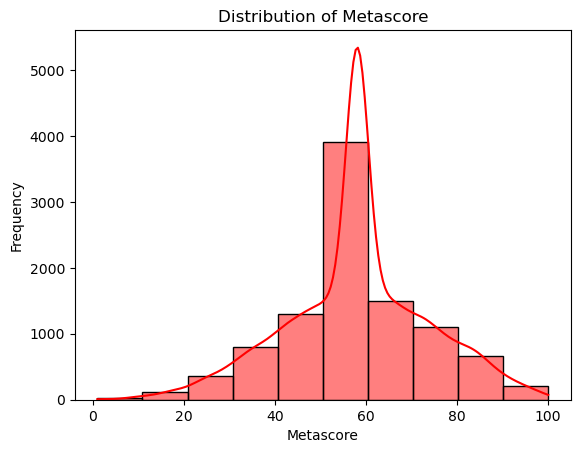

In [54]:
sns.histplot(imdb['Metascore'], bins=10, kde=True, color='red')
plt.title('Distribution of Metascore')
plt.xlabel('Metascore' )
plt.ylabel('Frequency' )
plt.show()

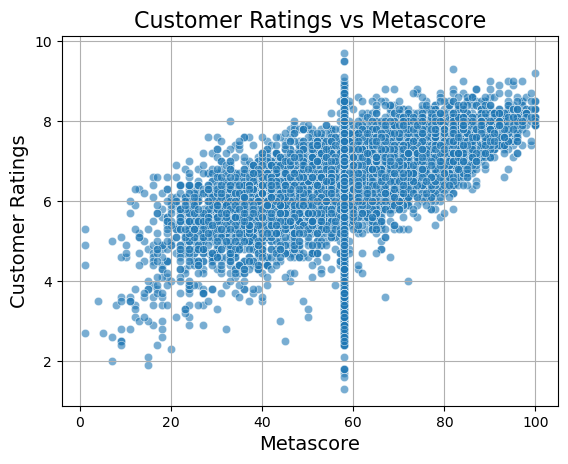

In [55]:
sns.scatterplot(data=imdb, x='Metascore', y='Rating', alpha=0.6)
plt.title('Customer Ratings vs Metascore', fontsize=16)
plt.xlabel('Metascore', fontsize=14)
plt.ylabel('Customer Ratings', fontsize=14)
plt.grid(True)

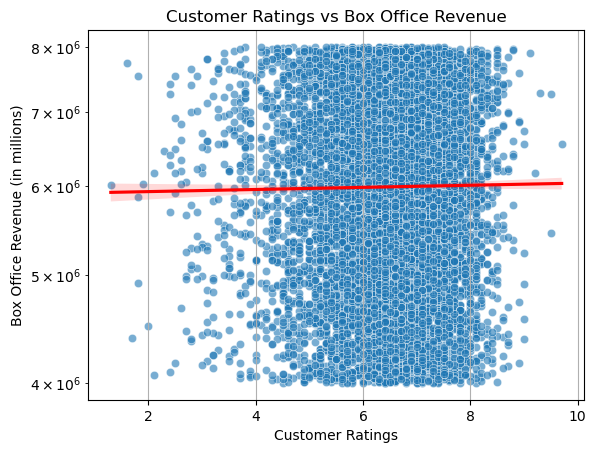

In [56]:
sns.scatterplot(data=imdb, x='Rating', y='Revenue', alpha=0.6)
sns.regplot(data=imdb, x='Rating', y='Revenue', scatter=False, color='red')
plt.title('Customer Ratings vs Box Office Revenue')
plt.xlabel('Customer Ratings')
plt.ylabel('Box Office Revenue (in millions)')
plt.xscale('linear') 
plt.yscale('log')    
plt.grid(True)
plt.show()